## 10k immu PBMC

To increase the amount of data i wil also add the PBMC sets. Most is copy paste from the whole_blood set

Open TODOs:
- check if microarray and PBMC is mergeable:
    - Flo emails
    - online research 
    - write down preproc pipeline from 10k 
    - compare manhattans
- add study_accession information, (add platform ... ) 
- clean up whole folder structure


In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
from utils.helper import violinplot_overall, scatter_plot, manhattanplot, get_negative_values, METADATA_COLS


ImportError: cannot import name 'manhattanplot' from 'utils.helper' (/home/eliasschreiner/PROJEKT/utils/helper.py)

In [ ]:
ten_k_prefix="/var/datasets/10kImmunomes/transcriptomics/"
print("\n###########################################################")
print("rna_seq_pbmc")
print("============================================================")
rna_seq_pbmc = pd.read_csv(f"{ten_k_prefix}/pbmc_rna_counts.csv",sep=",")
print(rna_seq_pbmc.columns)
print(rna_seq_pbmc.shape)


print("\n###########################################################")
print("marray_pbmc")
print("============================================================")
marray_pbmc = pd.read_csv(f"{ten_k_prefix}/gene_pbmc_formatted.csv",sep=",")
print(marray_pbmc.columns)
print(marray_pbmc.shape)



###########################################################
rna_seq_pbmc
Index(['hgnc', 'ES740442', 'ES740445', 'ES740448', 'ES740451', 'ES740454',
       'ES740457', 'ES740460', 'ES740463', 'ES740466',
       ...
       'ES740889', 'ES740892', 'ES740895', 'ES740898', 'ES740901', 'ES740904',
       'ES740907', 'ES740910', 'ES740913', 'ES740916'],
      dtype='object', length=160)
(23113, 160)

###########################################################
marray_pbmc


Index(['data_accession', 'subject_accession', 'age', 'gender', 'race',
       'study_accession', 'DDR1', 'RFC2', 'HSPA6', 'PAX8',
       ...
       'IGLON5', 'LRGUK', 'TMIGD2', 'DMRTA1', 'CCDC54', 'NA.395', 'ZBED9',
       'KBTBD12', 'CCDC63', 'GALR3'],
      dtype='object', length=18050)
(176, 18050)


### Microarray PBMC

Exact same method as Whole blood: copy paste

In [ ]:
####Microarray Data: Gene expression array data were obtained in three formats.
# Data in their original formats (.CEL files, series matrix files, etc) constitute the “raw” gene expression data.

# For data collected on Affymetrix platforms, we utilized the ReadAffy utility in the affy Bioconductor package to read in raw .CEL files. 
# The rma utility was used to conduct Robust Multichip Average (rma) background correction (as in (4)), quantile normalization, and log2 normalization of the data. 
##### CRITERIA: PLATFORM_DESCRIPTION contains 'Affymetrix'

# For data collected on Illumina platforms and stored in the Gene Expression Omnibus (GEO) database, we utilized the getGEO utility in the 
# GEOquery Bioconductor package to read the expression files and the preprocessCore package to conduction rma background correction, quantile normalization, and log2 normalization of the gene expression data.
##### CRITERIA: PLATFORM_DESCRIPTION contains 'illumina'

# Finally, for data collected on Illumina platforms but not stored in GEO, we utilized the read.ilmn utility of the limma Bioconductor package 
# to read in the data, and the neqc function to rma background correct, quantile normalize, and log2 normalize the gene expression data.
##### CRITERIA: Study has GSMxxxxxxxx information for study ? 

# In all instances, probe IDs were converted to Entrez Gene IDs. Where multiple probes mapped to the same Entrez Gene ID, 
# the median value across probes was used to represent the expression value of the corresponding gene.
# The background-corrected and normalized datasets were combined based on common Entrez IDs, missing values were imputed with a 
# k-nearest neighbors algorithm (R package: impute, function: impute.knn) using k = 10 and default values for rowmax, colmax, and maxp. 
# Enter Gene IDs were then converted to HUGO gene names. 
# These steps together produced the “formatted” gene expression files.

# To create the “formatted and normalized” datasets, we utilized established empirical Bayes algorithm ComBat for batch correction (2), compensating for possible batch effects while maintaining potential effects of age, race, and sex across datasets.

### okay das is schonmal nicht so einheitlich wie erhofft. 
### am besten sind die microarrays
print(f'Studies: {marray_pbmc.shape}')
print(f'Studies: {len(marray_pbmc['study_accession'].unique())}')
print(f'Subjects: {len(marray_pbmc['subject_accession'].unique())}')
print(f'Data ACCESSIONS ??: {len(marray_pbmc['data_accession'].unique())}')
marray_pbmc.head()

Studies: (176, 18050)
Studies: 7
Subjects: 165
Data ACCESSIONS ??: 176


,data_accession,subject_accession,age,gender,race,study_accession,DDR1,RFC2,HSPA6,PAX8,...,IGLON5,LRGUK,TMIGD2,DMRTA1,CCDC54,NA.395,ZBED9,KBTBD12,CCDC63,GALR3
0,GSM733843,SUB112829,26.0,Male,White,SDY269,3.636997,3.812365,6.357032,3.390811,...,3.126041,3.332293,4.616570,3.490975,3.421896,3.725747,3.298736,3.956550,4.308991,4.412242
1,GSM733852,SUB112831,40.0,Male,Black or African American,SDY269,3.799627,3.857310,4.737707,3.482260,...,3.325291,3.368136,5.263290,3.309746,3.308634,3.964230,3.329042,3.843393,3.934453,3.694510
2,GSM733855,SUB112836,28.0,Female,White,SDY269,3.682969,4.470334,5.901640,3.377821,...,3.210415,3.269840,5.213880,3.293049,3.303433,3.984925,3.097570,3.604278,3.803132,3.871821
3,GSM733858,SUB112838,39.0,Male,White,SDY269,3.901055,4.070229,6.657515,3.350098,...,3.216510,3.243445,4.541433,3.442143,3.458690,4.890399,3.506866,4.258766,3.733437,4.234583
4,GSM733861,SUB112839,23.0,Female,White,SDY269,4.039110,4.104200,4.744020,3.291414,...,3.195351,3.331442,5.325317,3.246671,3.282665,4.346354,3.269897,3.698939,3.670698,3.833476


In [ ]:
print(marray_pbmc['study_accession'].unique())
#SDY269 got 251 different REPOSITORY_ACCESSIONS -> individual subject ... its like GSM734016 -> when u enter into GEO you can get the platform (GPL13158)
mapping_platform_geo_id = {
    'SDY269':'GPL13158',
    'SDY33':'?', # keinen immport eintrag
    'SDY404':'GPL10558',
    'SDY420':'GPL4133',
    'SDY63':'GPL10558',
    'SDY720':'GPL10558',
    'SDY816':'?',  # keinen immport eintrag
                    }	
mapping_platform_description = {
    'SDY269':'[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM Array Plate',
    'SDY33':'Affymetrix CEL',
    'SDY404':'Illumina HumanHT-12 V4.0 expression beadchip',
    'SDY420':'Agilent-014850 Whole Human Genome Microarray 4x44K G4112F (Feature Number version)',
    'SDY63':'Illumina HumanHT-12 V4.0 expression beadchip',
    'SDY720':'Illumina HumanHT-12 V4.0 expression beadchip',
    'SDY816':'Illumina Beadarray',
                    }	

marray_pbmc['PLATFORM_GEO_ID'] = marray_pbmc['study_accession'].apply(lambda x: mapping_platform_geo_id.get(x))
marray_pbmc['PLATFORM_DESCRIPTION'] = marray_pbmc['study_accession'].apply(lambda x: mapping_platform_description.get(x))
marray_pbmc.head()



['SDY269' 'SDY33' 'SDY404' 'SDY420' 'SDY63' 'SDY720' 'SDY816']


,data_accession,subject_accession,age,gender,race,study_accession,DDR1,RFC2,HSPA6,PAX8,...,TMIGD2,DMRTA1,CCDC54,NA.395,ZBED9,KBTBD12,CCDC63,GALR3,PLATFORM_GEO_ID,PLATFORM_DESCRIPTION
0,GSM733843,SUB112829,26.0,Male,White,SDY269,3.636997,3.812365,6.357032,3.390811,...,4.616570,3.490975,3.421896,3.725747,3.298736,3.956550,4.308991,4.412242,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...
1,GSM733852,SUB112831,40.0,Male,Black or African American,SDY269,3.799627,3.857310,4.737707,3.482260,...,5.263290,3.309746,3.308634,3.964230,3.329042,3.843393,3.934453,3.694510,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...
2,GSM733855,SUB112836,28.0,Female,White,SDY269,3.682969,4.470334,5.901640,3.377821,...,5.213880,3.293049,3.303433,3.984925,3.097570,3.604278,3.803132,3.871821,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...
3,GSM733858,SUB112838,39.0,Male,White,SDY269,3.901055,4.070229,6.657515,3.350098,...,4.541433,3.442143,3.458690,4.890399,3.506866,4.258766,3.733437,4.234583,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...
4,GSM733861,SUB112839,23.0,Female,White,SDY269,4.039110,4.104200,4.744020,3.291414,...,5.325317,3.246671,3.282665,4.346354,3.269897,3.698939,3.670698,3.833476,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...


In [ ]:
#REORDER COLUMNS
cols = marray_pbmc.columns.tolist()
cols = cols[-2:] + cols[:-6]
marray_pbmc = marray_pbmc[cols]
marray_pbmc = marray_pbmc.drop_duplicates()
marray_pbmc['gender'] = marray_pbmc['gender'].apply(lambda x: x.lower() if isinstance(x, str) else x)
marray_pbmc.to_csv(f'pbmc/marray_pbmc_prepared.csv')

In [ ]:
marray_pbmc.describe()
### min values smaller 0 ... 

,age,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,...,NA.393,FAM9C,NA.394,CYP4F22,IGLON5,LRGUK,TMIGD2,DMRTA1,CCDC54,NA.395
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,49.129205,5.603392,5.471572,6.423034,5.248820,5.870361,9.240800,5.707411,5.309990,10.103931,...,4.917084,5.400291,5.520105,5.996245,4.849044,4.883923,5.966129,4.690320,5.427173,6.155032
std,21.010989,1.374919,1.966950,2.373595,1.572491,1.387611,1.997601,1.354840,1.614579,3.295919,...,2.204040,1.782421,2.157164,1.810762,2.197779,1.988535,2.034676,2.067220,1.708235,1.513866
min,21.000000,1.404652,-1.914664,-3.573877,0.873151,2.996996,5.158596,0.646830,1.748496,1.843911,...,-3.299661,1.849923,-0.654516,1.377134,-3.705184,-0.888561,-3.618128,-1.847743,1.820057,2.300847
25%,29.000000,4.104971,4.057392,5.723552,3.475311,4.951930,8.120506,4.417585,3.650107,9.356433,...,3.666117,3.349296,6.083498,5.538067,3.186594,3.302315,5.138877,3.285741,3.383824,5.442068
50%,44.000000,6.461618,6.716722,7.250434,5.950465,6.555722,9.291232,6.428568,6.440144,11.559820,...,6.096454,6.492935,6.506352,6.529917,6.108265,6.404505,6.657718,6.152496,6.512761,6.687601
75%,69.000000,6.671328,6.851903,7.928841,6.552937,6.681384,9.769344,6.813120,6.608989,12.407220,...,6.742032,6.597927,6.651819,7.009729,6.547797,6.613444,6.853296,6.511713,6.649895,7.068366
max,90.000000,8.578195,10.828457,12.867650,8.932970,7.955467,13.675984,8.426863,7.615839,13.418691,...,7.315407,8.833657,8.289775,13.953237,7.072877,7.651388,12.400633,6.741002,9.480155,8.966380


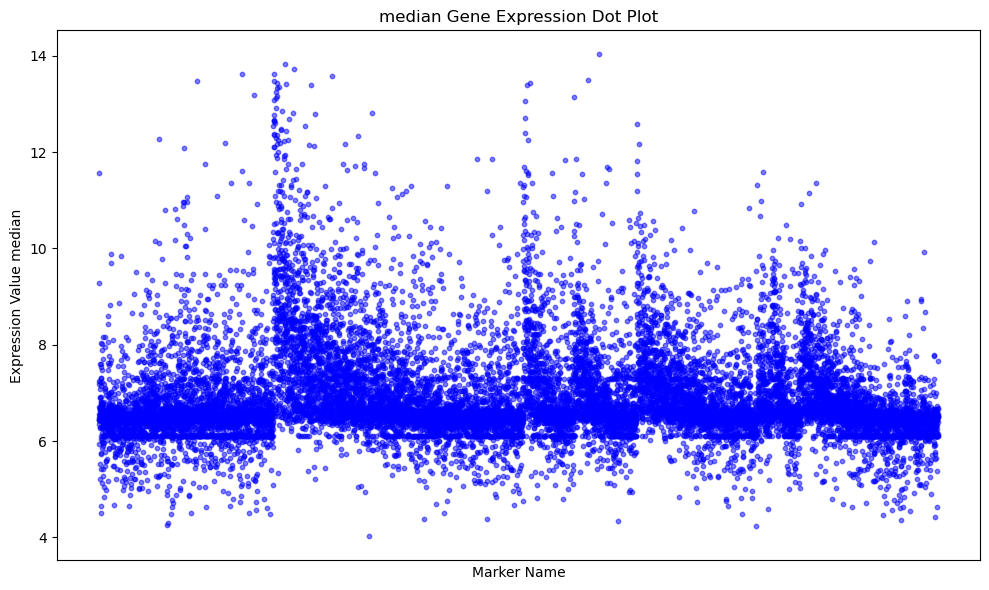

In [ ]:
manhattanplot(marray_pbmc, start_col=8)

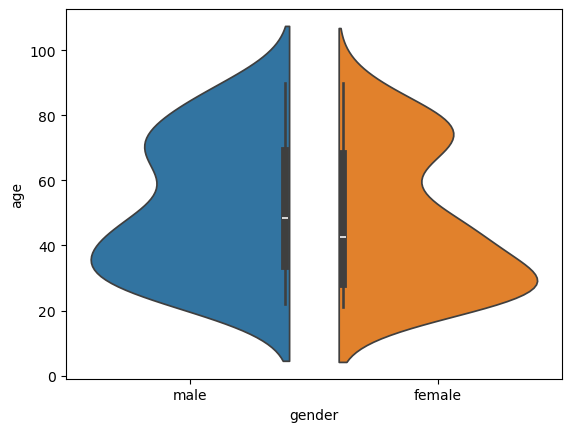

In [ ]:
violinplot_overall(marray_pbmc,  x_topic='gender', y_topic='age', hue_split='gender', bin_name='pbmc')

# RNAseq PBMC

already got stuff from 10k_immu notebook... 

In [ ]:
#### RNA-Seq Whole Blood and PBMC Data: 
# The RNA-Seq peripheral mononucler cells comes from Immport study SDY67.
# The files used from Immport were formatted and normalized by the EPIC Consortium. 
#### This apparently made the FKPM transofrmation. -> TPM
# The whole blood datasets were converted into TPM files and harmonized together using the HarmonyRNA algorithm. 
#### 
# More information on the study can be found in this Nature Article published by Amy H. Lee, et al. 
# Some minor additional formatting was done for presenting data on 10k Immunomes.
print('RNAseq PBMC: ')
rna_seq_pbmc_T = rna_seq_pbmc.T
rna_seq_pbmc_T.reset_index(0, inplace=True)
rna_seq_pbmc_T.columns = rna_seq_pbmc_T.iloc[0]
rna_seq_pbmc_T = rna_seq_pbmc_T.drop(rna_seq_pbmc_T.index[0])
### metadata is separate here
rnaseq_pbmc_metadata = pd.read_csv(ten_k_prefix+'rnaseq_pbmc_metadata.csv')
rna_seq_pbmc_T = rna_seq_pbmc_T.rename(columns={'hgnc': 'Subject'})
rna_seq_pbmc_T_w_meta = pd.merge(rna_seq_pbmc_T, rnaseq_pbmc_metadata, on='Subject', how='left')

## Rearrange columns: 
cols = rna_seq_pbmc_T_w_meta.columns.tolist()
cols = cols[-4:] + cols[:-4]
rna_seq_pbmc_T_w_meta = rna_seq_pbmc_T_w_meta[cols]
## nice ! 
print(f'Genes: {rna_seq_pbmc_T_w_meta.shape}')
print(f'Studies: {len(rna_seq_pbmc_T_w_meta['Study'].unique())}')
print(f'Subjects: {len(rna_seq_pbmc_T_w_meta['Subject'].unique())}')
### only one study (SDY67)
rna_seq_pbmc_T_w_meta['PLATFORM_GEO_ID'] = 'GPL11154'
rna_seq_pbmc_T_w_meta['PLATFORM_DESCRIPTION'] = 'Illumina HiSeq 2500 (Homo sapiens)'
## Rearrange columns: 
cols = rna_seq_pbmc_T_w_meta.columns.tolist()
cols = cols[-2:] + cols[:-2]
rna_seq_pbmc_T_w_meta = rna_seq_pbmc_T_w_meta[cols]
rna_seq_pbmc_T_w_meta = rna_seq_pbmc_T_w_meta.drop_duplicates()
rna_seq_pbmc_T_w_meta.head()

### SDY67 
### hat keine repo ID ... 

RNAseq PBMC: 
Genes: (159, 23118)
Studies: 1
Subjects: 159


,PLATFORM_GEO_ID,PLATFORM_DESCRIPTION,Sex,Age,Study,Expression,Subject,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,62,SDY67,59,ES740442,59,1049,119,...,910,354,1204,4243,13189,25,7935,72627,24630,8006
1,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,53,SDY67,57,ES740445,57,1213,204,...,1019,366,1012,3074,13138,10,7348,78634,17712,5779
2,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Male,57,SDY67,48,ES740448,48,931,170,...,761,405,971,3264,12805,24,6778,88016,27285,5887
3,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,52,SDY67,67,ES740451,67,726,147,...,1215,398,1252,4255,13864,11,8402,86859,23556,6637
4,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,56,SDY67,51,ES740454,51,846,151,...,711,279,1136,3977,9974,8,7154,52028,18507,5878


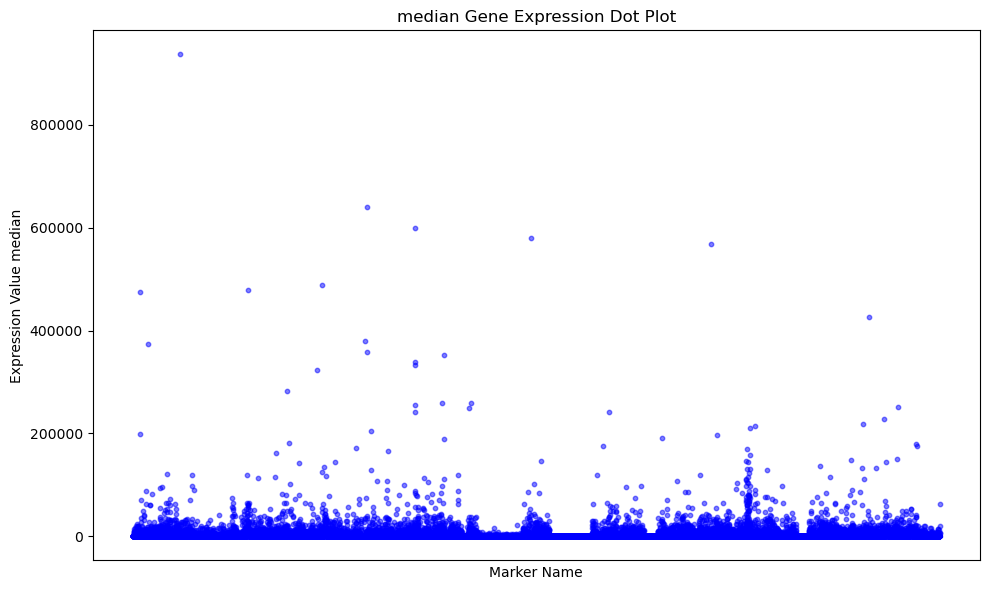

In [ ]:
manhattanplot(rna_seq_pbmc_T_w_meta, start_col=7)

#### (own) Preprocessing
match manhattan plots, similar as in whole blood

In [ ]:
## Step1: Quant. normalisation
import qnorm
rna_seq_pbmc_T_wo_meta = rna_seq_pbmc_T_w_meta.iloc[:, 7:]
metadata = rna_seq_pbmc_T_w_meta.iloc[:, :7]
rna_seq_pbmc_T_wo_meta_quant = qnorm.quantile_normalize(rna_seq_pbmc_T_wo_meta, axis=0).astype(float)
print(rna_seq_pbmc_T_wo_meta_quant.columns)

## Step2: log2 normalization
rna_seq_pbmc_T_wo_meta_quant = rna_seq_pbmc_T_wo_meta_quant+1.
rna_seq_pbmc_T_wo_meta_log2 = np.log2(rna_seq_pbmc_T_wo_meta_quant) 
rna_seq_pbmc_T_wo_meta_log2 = rna_seq_pbmc_T_wo_meta_log2.astype(float)
rna_seq_pbmc_T_wo_meta_log2.head()

Index(['1/2-SBSRNA4', 'A1BG', 'A1BG-AS1', 'A1CF', 'A2LD1', 'A2M', 'A2ML1',
       'A2MP1', 'A4GALT', 'A4GNT',
       ...
       'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC', 'ZYG11A', 'ZYG11B', 'ZYX',
       'ZZEF1', 'ZZZ3'],
      dtype='object', length=23113)


,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,A4GALT,A4GNT,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,5.735167,9.748657,6.709102,2.252753,9.140285,7.639474,2.505902,2.892420,4.584570,0.036481,...,9.539756,8.226283,9.945780,11.765542,13.404564,4.520423,12.677915,15.838237,14.318264,12.691155
1,5.828502,9.986448,7.529541,1.097522,9.433448,7.465872,3.274635,3.274635,2.684996,1.694992,...,9.741478,8.329958,9.733420,11.313215,13.384158,3.574118,12.559730,16.068939,13.833620,12.209472
2,5.377848,9.689586,7.196278,1.404639,9.093787,7.828838,2.812513,4.172825,4.889302,0.787601,...,9.395696,8.491248,9.749250,11.460095,13.369414,4.414754,12.472622,16.135238,14.426538,12.274406
3,5.857256,9.077746,6.910044,0.891457,9.035920,7.514671,3.002626,3.630230,4.884305,0.027663,...,9.793305,8.230373,9.842919,11.585683,13.326496,3.424747,12.590140,16.094475,14.135369,12.251815
4,5.741508,9.721604,7.296642,1.712597,10.470250,7.222041,1.712597,4.064076,2.695879,2.442348,...,9.483708,8.167718,10.140233,11.883391,13.169046,3.300855,12.696401,15.438076,14.006574,12.437440


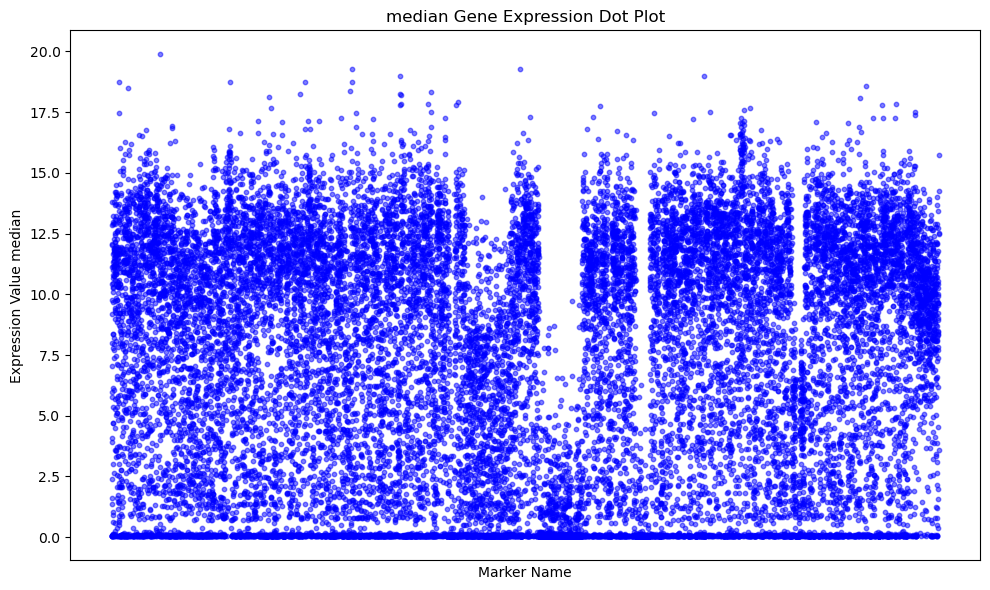

In [ ]:
manhattanplot(rna_seq_pbmc_T_wo_meta_log2, start_col=0)

In [ ]:
### get metadata back into CSV
rna_seq_pbmc_T_w_meta = rna_seq_pbmc_T_w_meta.rename(columns={'Age': 'age', 'Sex': 'gender', 
                                                              'Study':'study_accession', 
                                                              'Expression': 'data_accession', 
                                                            'Subject': 'subject_accession'})
rna_seq_pbmc_T_w_meta_log2 = metadata.join(rna_seq_pbmc_T_wo_meta_log2)
rna_seq_pbmc_T_w_meta_log2.to_csv(f'pbmc/rna_seq_pbmc_T_w_meta_preproc.csv')


In [ ]:
rna_seq_pbmc_T_w_meta_log2.head()

,PLATFORM_GEO_ID,PLATFORM_DESCRIPTION,Sex,Age,Study,Expression,Subject,1/2-SBSRNA4,A1BG,A1BG-AS1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,62,SDY67,59,ES740442,5.735167,9.748657,6.709102,...,9.539756,8.226283,9.945780,11.765542,13.404564,4.520423,12.677915,15.838237,14.318264,12.691155
1,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,53,SDY67,57,ES740445,5.828502,9.986448,7.529541,...,9.741478,8.329958,9.733420,11.313215,13.384158,3.574118,12.559730,16.068939,13.833620,12.209472
2,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Male,57,SDY67,48,ES740448,5.377848,9.689586,7.196278,...,9.395696,8.491248,9.749250,11.460095,13.369414,4.414754,12.472622,16.135238,14.426538,12.274406
3,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,52,SDY67,67,ES740451,5.857256,9.077746,6.910044,...,9.793305,8.230373,9.842919,11.585683,13.326496,3.424747,12.590140,16.094475,14.135369,12.251815
4,GPL11154,Illumina HiSeq 2500 (Homo sapiens),Female,56,SDY67,51,ES740454,5.741508,9.721604,7.296642,...,9.483708,8.167718,10.140233,11.883391,13.169046,3.300855,12.696401,15.438076,14.006574,12.437440


In [ ]:
description = rna_seq_pbmc_T_w_meta_log2.describe().T
negative_mins = description[description['min'] < 0]
print(negative_mins)
rna_seq_pbmc_T_w_meta_log2.describe()
#### no negative values here 


Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


,Age,Expression,1/2-SBSRNA4,A1BG,A1BG-AS1,A1CF,A2LD1,A2M,A2ML1,A2MP1,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,...,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,60.169811,53.767296,5.744681,9.733277,7.039027,1.580866,9.185034,8.006524,2.391515,4.098275,...,9.629022,8.479284,9.981842,11.728434,13.427929,3.500736,12.478359,15.724639,14.220535,12.436773
std,6.897264,20.227565,0.356361,0.600004,0.292213,0.962466,0.327880,0.887731,0.941592,1.104482,...,0.202628,0.422328,0.318573,0.344712,0.221539,0.903275,0.218379,0.351194,0.320263,0.304221
min,50.000000,16.000000,4.607525,8.003661,6.056387,0.004547,8.425872,5.205859,0.015506,0.821281,...,8.974739,7.747363,8.994549,10.731698,12.617722,0.160696,11.310393,14.717426,12.414169,11.186319
25%,55.000000,38.000000,5.511464,9.417626,6.873009,0.937238,8.986650,7.429853,1.843430,3.361774,...,9.495905,8.200521,9.786948,11.537432,13.329107,3.011430,12.375532,15.543335,14.037410,12.265322
50%,59.000000,55.000000,5.782837,9.748657,7.052502,1.604273,9.177905,7.988863,2.392037,4.082806,...,9.633627,8.438903,10.030583,11.763727,13.432513,3.574118,12.511728,15.733610,14.257655,12.468548
75%,66.000000,67.500000,5.977341,9.952437,7.212469,2.363113,9.371516,8.588022,3.000651,4.798179,...,9.752066,8.676478,10.179759,11.943520,13.542633,4.115820,12.625071,16.001279,14.439311,12.625499
max,73.000000,155.000000,6.752744,13.750249,7.758889,3.745574,10.470250,10.484012,4.652291,6.929519,...,10.288508,10.368021,10.776092,12.722183,14.141812,5.739848,12.815836,16.606520,14.830476,13.115670


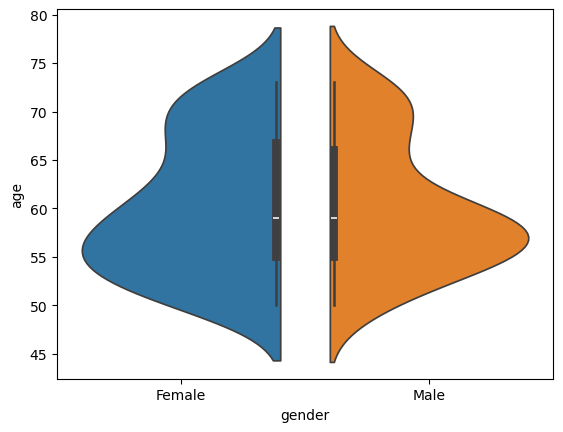

In [ ]:
violinplot_overall(rna_seq_pbmc_T_w_meta,  x_topic='gender', y_topic='age', hue_split='gender', bin_name='pbmc')

## MERGE area

In [ ]:
rna_seq_pbmc_T_w_meta.shape

(159, 23121)

In [ ]:
marray_pbmc.shape
marray_pbmc.describe()

,age,DDR1,RFC2,HSPA6,PAX8,GUCA1A,UBA7,THRA,PTPN21,CCL5,...,NA.393,FAM9C,NA.394,CYP4F22,IGLON5,LRGUK,TMIGD2,DMRTA1,CCDC54,NA.395
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,...,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,49.129205,5.603392,5.471572,6.423034,5.248820,5.870361,9.240800,5.707411,5.309990,10.103931,...,4.917084,5.400291,5.520105,5.996245,4.849044,4.883923,5.966129,4.690320,5.427173,6.155032
std,21.010989,1.374919,1.966950,2.373595,1.572491,1.387611,1.997601,1.354840,1.614579,3.295919,...,2.204040,1.782421,2.157164,1.810762,2.197779,1.988535,2.034676,2.067220,1.708235,1.513866
min,21.000000,1.404652,-1.914664,-3.573877,0.873151,2.996996,5.158596,0.646830,1.748496,1.843911,...,-3.299661,1.849923,-0.654516,1.377134,-3.705184,-0.888561,-3.618128,-1.847743,1.820057,2.300847
25%,29.000000,4.104971,4.057392,5.723552,3.475311,4.951930,8.120506,4.417585,3.650107,9.356433,...,3.666117,3.349296,6.083498,5.538067,3.186594,3.302315,5.138877,3.285741,3.383824,5.442068
50%,44.000000,6.461618,6.716722,7.250434,5.950465,6.555722,9.291232,6.428568,6.440144,11.559820,...,6.096454,6.492935,6.506352,6.529917,6.108265,6.404505,6.657718,6.152496,6.512761,6.687601
75%,69.000000,6.671328,6.851903,7.928841,6.552937,6.681384,9.769344,6.813120,6.608989,12.407220,...,6.742032,6.597927,6.651819,7.009729,6.547797,6.613444,6.853296,6.511713,6.649895,7.068366
max,90.000000,8.578195,10.828457,12.867650,8.932970,7.955467,13.675984,8.426863,7.615839,13.418691,...,7.315407,8.833657,8.289775,13.953237,7.072877,7.651388,12.400633,6.741002,9.480155,8.966380


In [ ]:
## Step1: rename stuff so they match each other (and also whole blood .csv table....)
rna_seq_pbmc_T_w_meta['METHOD']='rnaseq'
marray_pbmc['METHOD']='array'

common_columns = rna_seq_pbmc_T_w_meta.columns.intersection(marray_pbmc.columns)
# put metadtaa together
common_columns = common_columns.to_list()
last_element = common_columns.pop()
common_columns.insert(0, last_element)


combi_df_pbmc = pd.concat([marray_pbmc, rna_seq_pbmc_T_w_meta], ignore_index=True)
combi_df_pbmc['gender'] = combi_df_pbmc['gender'].str.lower()
combi_df_pbmc['TYPE']='pbmc'
print(combi_df_pbmc.shape)


### Remove possible duplicated subjects and entries with Nan 
combi_df_pbmc_reduced = combi_df_pbmc.drop_duplicates()
combi_df_pbmc_reduced = combi_df_pbmc_reduced.drop_duplicates(subset=['subject_accession'], keep='first')
print(combi_df_pbmc_reduced.shape)


## drop entries that dont fullfill those min metadata
essential_columns = ['age', 'gender', 'study_accession']
combi_df_pbmc_reduced = combi_df_pbmc_reduced.dropna(subset=essential_columns, axis=0, how='any')
print(combi_df_pbmc_reduced.shape)

# Handle NA values
#combi_df_whole_blood_reduced = combi_df_whole_blood_reduced.dropna(axis=1, how='any') 
#print(combi_df_whole_blood_reduced.shape)

combi_df_pbmc.head()


/tmp/ipykernel_469233/1637024865.py:25: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  combi_df_pbmc['TYPE']='pbmc'


(335, 25021)
(324, 25021)
(324, 25021)


,PLATFORM_GEO_ID,PLATFORM_DESCRIPTION,data_accession,subject_accession,age,gender,race,study_accession,DDR1,RFC2,...,ZNF880,ZNF890P,ZNF90,ZNF98,ZNFX1-AS1,ZNRD1-AS1,ZSCAN12,ZSCAN12P1,ZSCAN5B,TYPE
0,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GSM733843,SUB112829,26.0,male,White,SDY269,3.636997,3.812365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbmc
1,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GSM733852,SUB112831,40.0,male,Black or African American,SDY269,3.799627,3.85731,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbmc
2,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GSM733855,SUB112836,28.0,female,White,SDY269,3.682969,4.470334,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbmc
3,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GSM733858,SUB112838,39.0,male,White,SDY269,3.901055,4.070229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbmc
4,GPL13158,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GSM733861,SUB112839,23.0,female,White,SDY269,4.03911,4.1042,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pbmc


In [ ]:
combi_df_pbmc.to_csv(f'pbmc/combi_df_pbmc_all.csv')


In [ ]:
no_meta_cols = list(set(common_columns) - set(METADATA_COLS))
print(len(no_meta_cols))
new_order_cols = METADATA_COLS + no_meta_cols
print(len(new_order_cols))

16142
16151


In [ ]:
combi_df_pbmc_common_cols = combi_df_pbmc[new_order_cols]
combi_df_pbmc_common_cols.to_csv(f'pbmc/combi_df_pbmc_common_cols.csv')


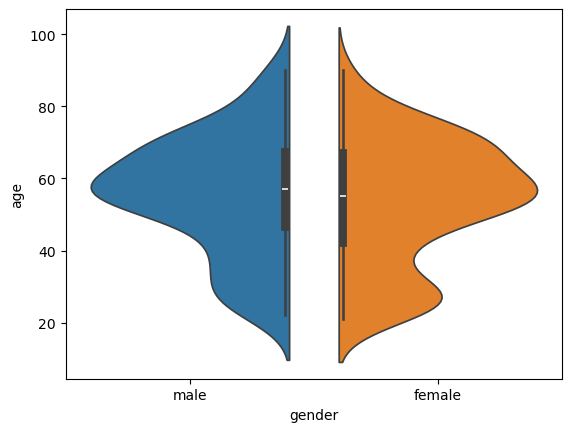

In [ ]:
violinplot_overall(combi_df_pbmc_common_cols,  x_topic='gender', y_topic='age', hue_split='gender', bin_name='pbmc')

In [ ]:
print(combi_df_pbmc_common_cols.shape)
combi_df_pbmc_common_cols.head()

(335, 16151)


,age,study_accession,gender,subject_accession,METHOD,TYPE,PLATFORM_DESCRIPTION,PLATFORM_GEO_ID,data_accession,ZNF517,...,CHRND,ALAS2,TUSC3,STC2,ZNF23,CDKN2B,SNX10,TM4SF18,DYRK1B,RBFOX3
0,26.0,SDY269,male,SUB112829,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733843,3.599545,...,3.554479,4.918226,3.675708,3.368919,4.150696,3.526192,8.069136,3.432507,3.773433,3.339224
1,40.0,SDY269,male,SUB112831,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733852,3.801048,...,3.635489,5.772331,3.441598,3.453516,5.279789,3.524343,7.066381,3.443959,3.929056,3.677962
2,28.0,SDY269,female,SUB112836,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733855,3.625211,...,3.489008,5.288885,3.245684,3.403299,4.648052,3.871679,8.172455,3.408233,3.937514,3.288126
3,39.0,SDY269,male,SUB112838,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733858,3.63141,...,3.343559,4.940015,3.399281,3.386121,4.108815,3.632026,8.207862,3.63704,3.709359,3.232216
4,23.0,SDY269,female,SUB112839,array,pbmc,[HT_HG-U133_Plus_PM] Affymetrix HT HG-U133+ PM...,GPL13158,GSM733861,3.600073,...,3.280373,3.819249,3.413637,3.50563,5.065027,3.450685,7.580987,3.497303,3.916248,3.402721


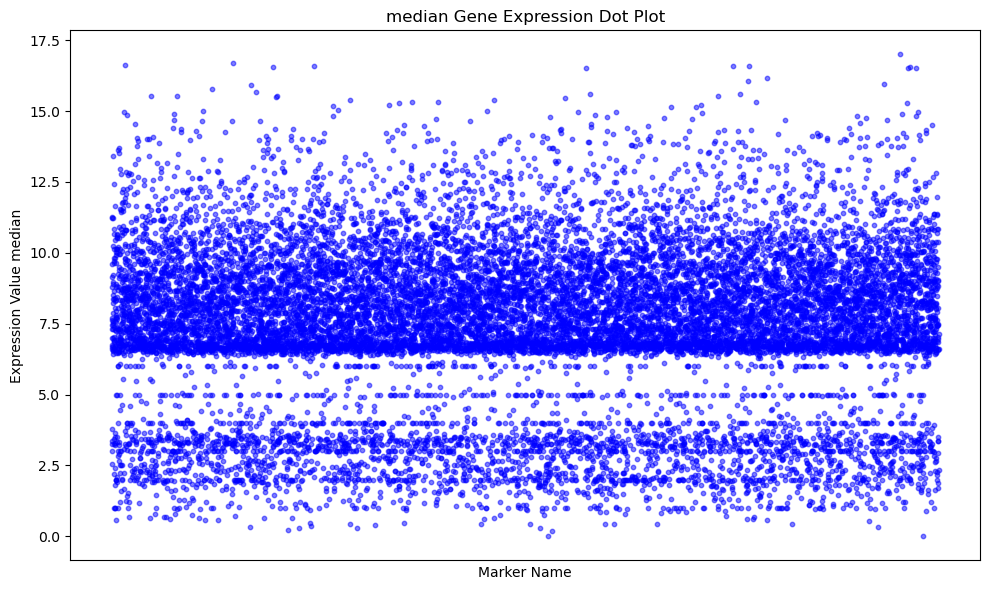

In [ ]:
manhattanplot(combi_df_pbmc_common_cols, start_col=9)

In [ ]:
description = combi_df_pbmc_common_cols.describe().T
negative_mins = description[description['min'] < 0]
print(negative_mins)
combi_df_pbmc_common_cols.describe()

Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


,age
count,335.000000
mean,54.369373
std,16.861058
min,21.000000
25%,42.500000
50%,56.000000
75%,67.020000
max,90.000000


# Paper  Enrichment score
### Problem: Needs gene sets with related genes ... 
### Increase comparability between microarray and RNAseq
https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008295 <- hier wird eben gezeigt wie der score nützlich ist (Spearson corr index almost 1)>
https://www.nature.com/articles/nature08460 <- des is der eigentliche enrichment score paper >
transformed gene expression values to gene set enrichment scores (ES) by mapping the genes on preselected groups of genes. Gene sets are groups of genes that have been experimentally and/or computationally related to a biological function
involves the conversion from gene expression levels to ranks

In [ ]:



combi_df_pbmc_common_cols